# 作业1

## 一、前期准备

### 1.库的导入与一些函数定义

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#计算标称属性的频数
def frequency(categorical_column) :
    return categorical_column.value_counts()

#计算数值属性的五数概括    
def five_number_summary(numerical_columns):
    return numerical_columns.describe()[3:]

#计算列中缺失值的数量
def num_of_null_value(column):
    count = 0
    for v in column:
        if pd.isna(v):
            count += 1
    return count

### 2.数据加载和预处理

加载数据集 Alzheimer Disease and Healthy Aging Data In US
以及数据集 Movies Dataset from Pirated Sites

In [54]:
'''    
数据集 Alzheimer Disease and Healthy Aging Data In US第13，14列应为数值类型，
但检查发现包含极少数异常值,异常值类型为str,值为'.',无意义，因此将其视为缺失值处理
na_values = ['.']即代表将'.'视为缺失值
'''

hdata = pd.read_csv('./health_dataset.csv',low_memory=False,na_values = ['.'])
mdata = pd.read_csv('./movies_dataset.csv',low_memory=False,)
print(mdata.columns)
mdata
#downloads数字采用逗号隔开，需转化为纯数字
mdata['downloads'] = mdata.downloads.apply(lambda  x: int(str(x).replace(',','')) if not pd.isna(x) else x)

#run_time数据一部分采用如1 h 20 min的表示方法，需转化为分钟表示的纯数字
mdata['run_time'] = mdata.run_time.apply(lambda  x: int(str(x).split('h')[0].strip())*60 + int(str(x).split('h')[1].split('min')[0].strip()) if (not pd.isna(x)) and 'h' in str(x) and 'min' in str(x)  else(int(str(x).split('h')[0].strip())*60 if (not pd.isna(x) and 'h' in str(x) and 'min' not in str(x) ) else ( int(str(x).split('min')[0].strip()) if (not pd.isna(x) and 'h' not in str(x) and 'min' in str(x) )  else x )))
#转化为float类型
#(-1 if pd.isna(x) else x)
mdata['run_time'] = mdata['run_time'].astype(float)

#views数字采用逗号隔开，需转化为纯数字
mdata['views'] = mdata.views.apply(lambda  x: int(str(x).replace(',','')) if not pd.isna(x) else x)
#mdata['views'] = mdata['views'].astype(float)
for col in mdata.columns:
    print(mdata[col].dtype)

Index(['Unnamed: 0', 'IMDb-rating', 'appropriate_for', 'director', 'downloads',
       'id', 'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')
int64
float64
object
object
float64
int64
object
object
object
object
float64
object
object
float64
object


In [31]:
hnum_attr,hcat_attr = [],[]
for col in hdata.columns:
    #标称属性
    if hdata[col].dtype in ['int64','float64'] and 'ID' not in col :
        hnum_attr.append(col)
    #数值属性
    else:
        hcat_attr.append(col)
mnum_attr,mcat_attr = [],[]
for i,col in enumerate(mdata.columns):
    '''
    第1列为索引值，无需分析处理
    第5列为id，也无需分析处理，
    索引值各不相同，id值也是
    对数量巨大的各不相同的数据做频数统计没有意义，因此抛弃这两列
    
    第12列 storyline和第13列 title，不同电影的故事情节和标题极大概率不相同，
    且经验证，数据集中不包含相同的电影。对数量巨大的各不相同的数据做频数统计没有意义，因此抛弃这两列
    '''
    if i == 0 or i == 5 or i == 11 or i == 12:
        continue
    #标称属性
    if mdata[col].dtype in ['int64','float64']:
        mnum_attr.append(col)
    #数值属性
    else :
        mcat_attr.append(col)
print('数据集\tAlzheimer Disease and Healthy Aging Data In US\t的属性:\n')
print('标称属性',hcat_attr,'\n')
print('数值属性',hnum_attr,'\n')
print('数据集\tMovies Dataset from Pirated Sites\t的属性:\n')
print('标称属性',mcat_attr,'\n')
print('数值属性',mnum_attr,'\n')

数据集	Alzheimer Disease and Healthy Aging Data In US	的属性:

标称属性 ['LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'LocationID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2'] 

数值属性 ['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size'] 

数据集	Movies Dataset from Pirated Sites	的属性:

标称属性 ['appropriate_for', 'director', 'industry', 'language', 'posted_date', 'release_date', 'writer'] 

数值属性 ['IMDb-rating', 'downloads', 'run_time', 'views'] 



## 二、数据摘要和可视化

### 1.对数据集Alzheimer Disease and Healthy Aging Data In US的处理

#### 1.1数值属性的五数概括

其中'Sample_Size'属性值全部为空，pandas读取时默认为数值属性，
但对全部为空值的属性操作没有意义，因此将其剔除数值属性列表（原为列表最后一个元素）

In [147]:
five_number = five_number_summary(hdata[hnum_attr[:-1]]) 
print('\t\t\t\t数值属性的五数概括')
print(five_number)

				数值属性的五数概括
     YearStart  YearEnd  Data_Value  Data_Value_Alt  Low_Confidence_Limit  \
min     2015.0   2015.0         0.0             0.0                   0.0   
25%     2016.0   2016.0        15.3            15.3                  12.0   
50%     2017.0   2018.0        32.5            32.5                  26.9   
75%     2019.0   2019.0        56.8            56.8                  49.1   
max     2020.0   2020.0       100.0           100.0                  99.6   

     High_Confidence_Limit  
min                    1.4  
25%                   19.0  
50%                   38.5  
75%                   64.7  
max                  100.0  


#### 1.2数值属性的缺失值个数

In [120]:
losts = []
for c in hnum_attr:
    losts.append(num_of_null_value(hdata[c]))
print('各数值属性缺失值的个数')
print(*hnum_attr,sep=' ')
print(*losts,sep=' ')

YearStart YearEnd Data_Value Data_Value_Alt Low_Confidence_Limit High_Confidence_Limit Sample_Size
0 0 69833 69833 70009 70009 214462


#### 1.3标称属性的频数以及可视化

['LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'LocationID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2']


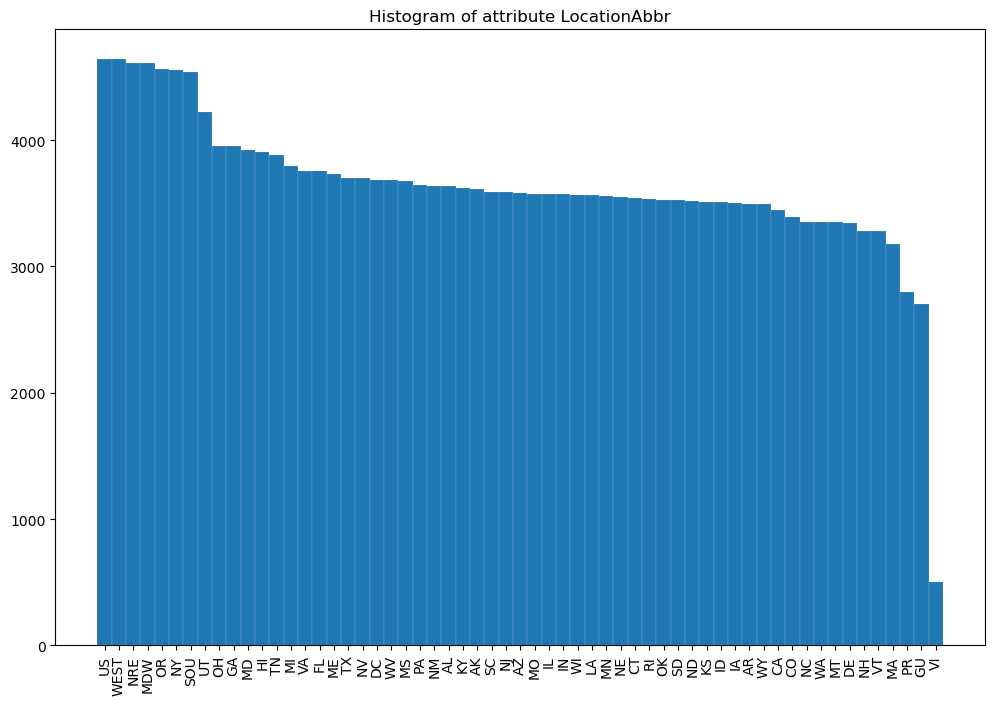

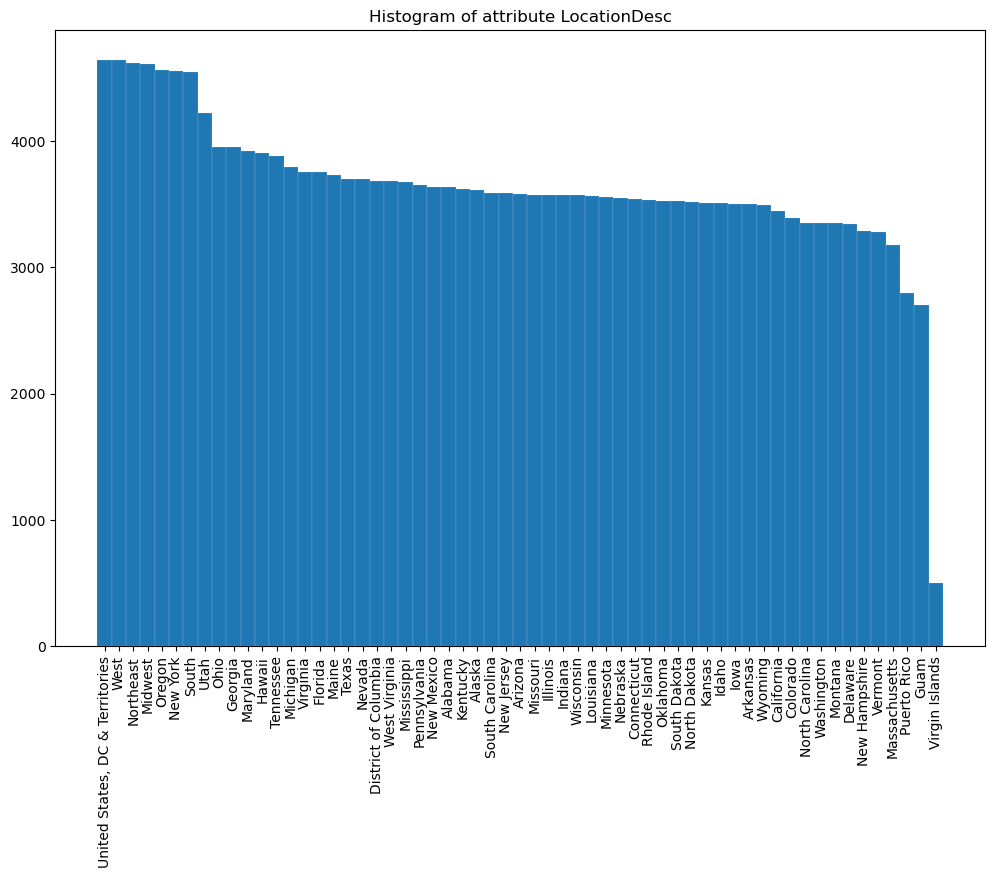

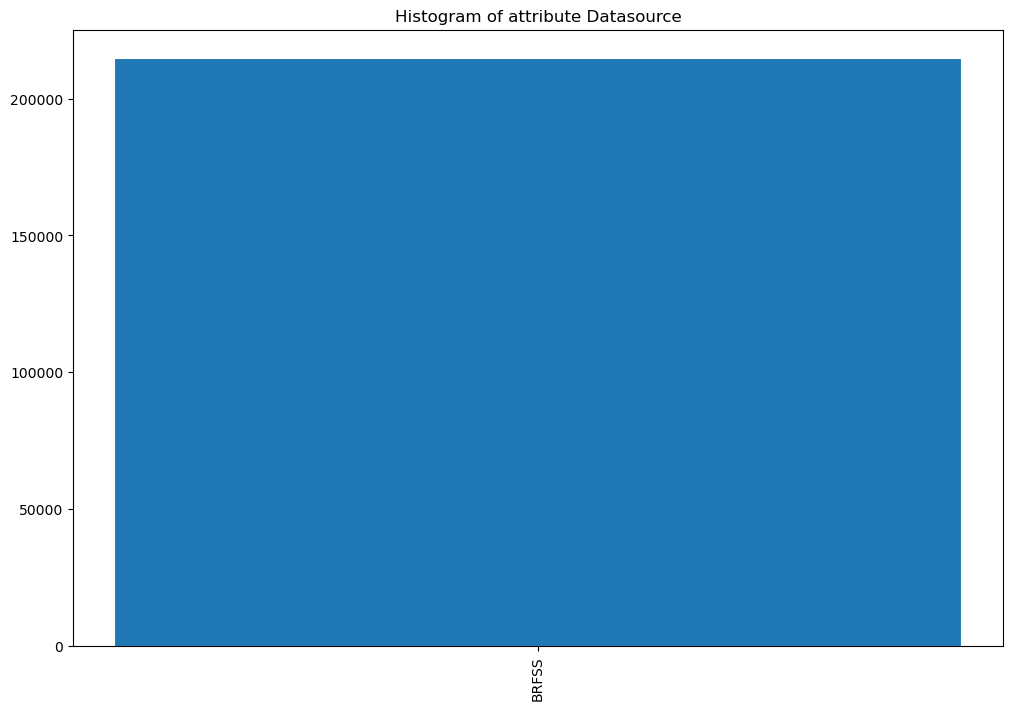

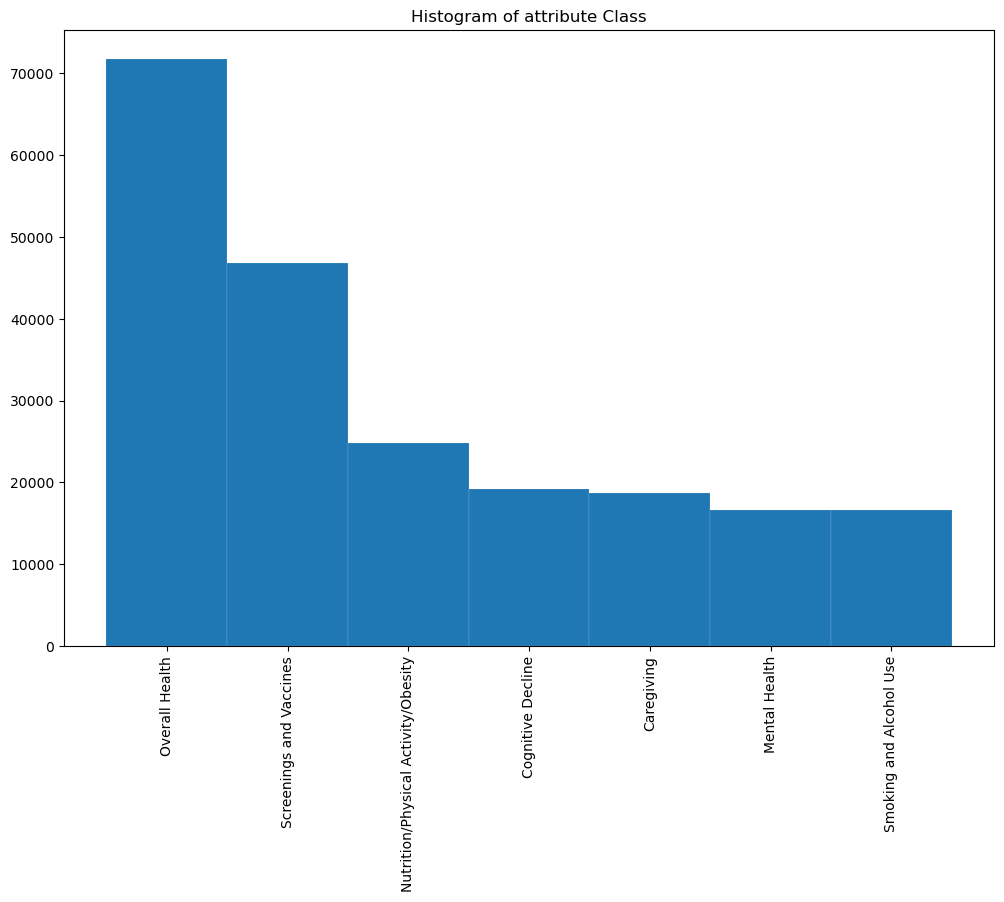

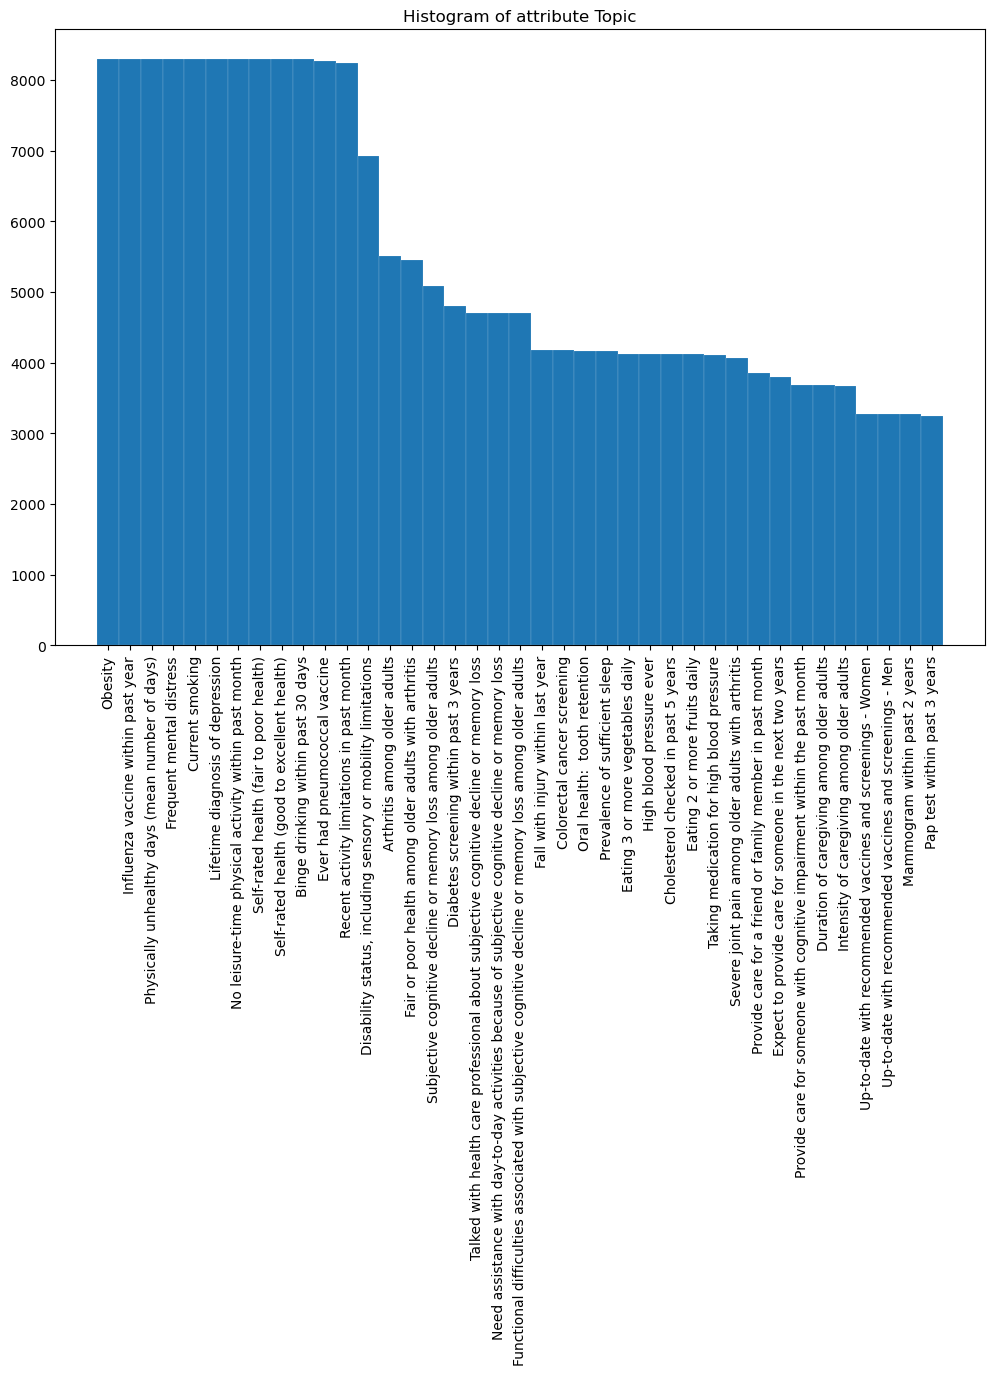

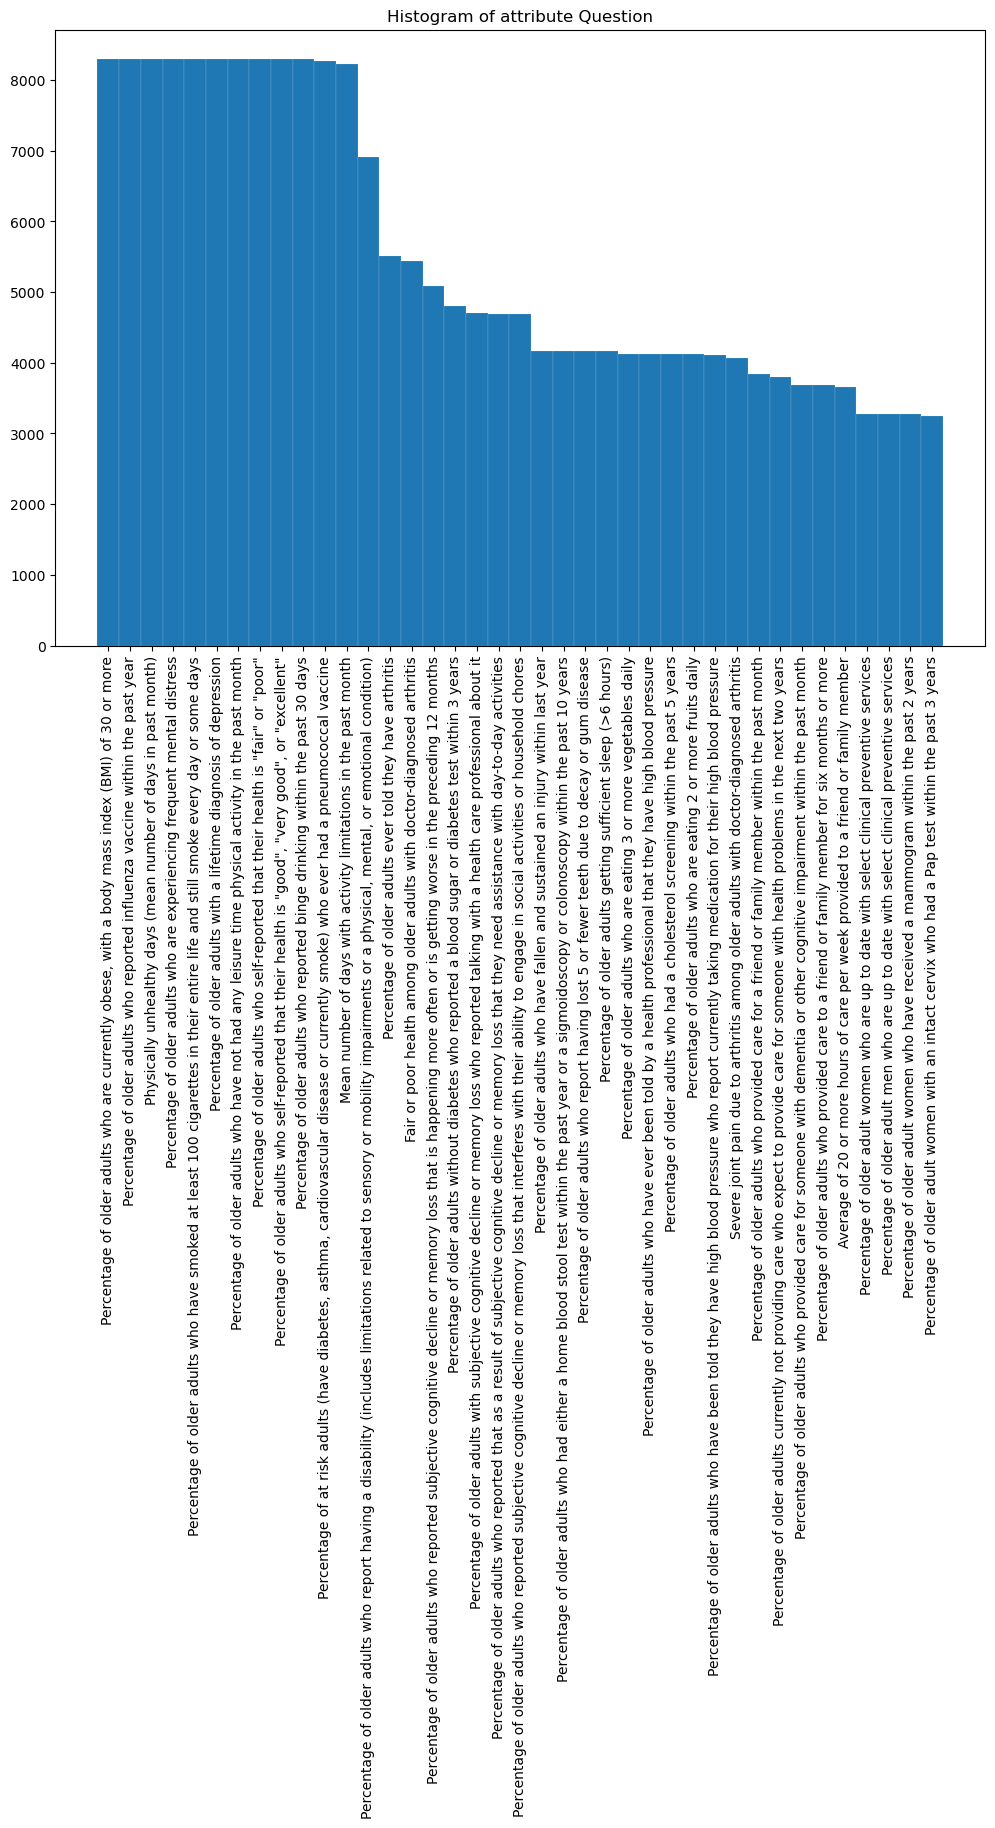

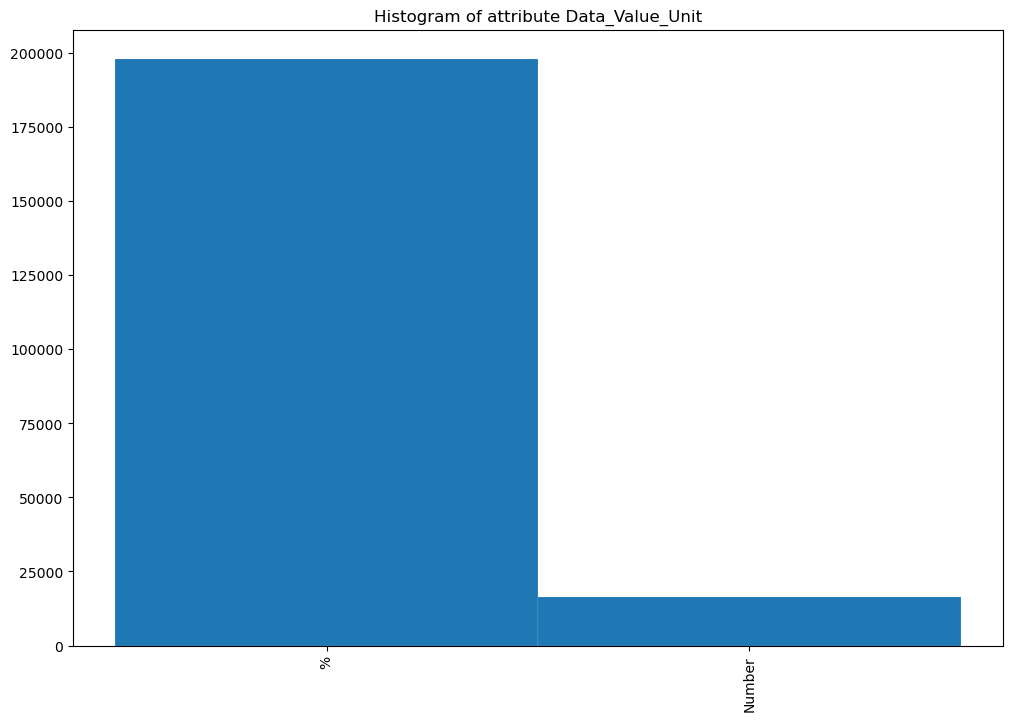

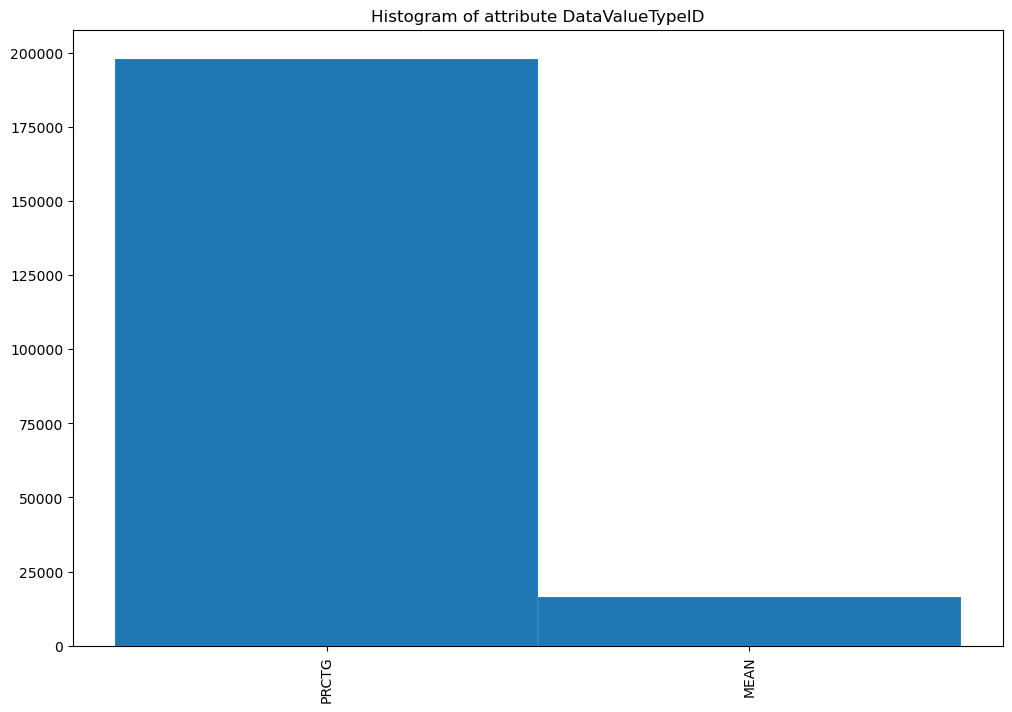

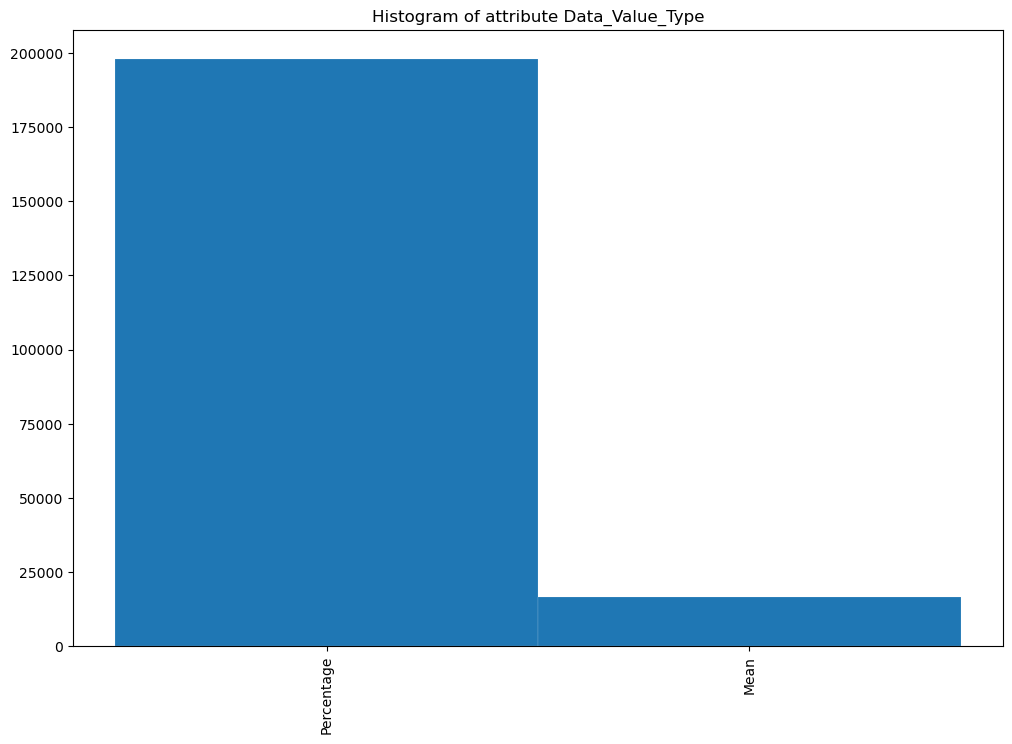

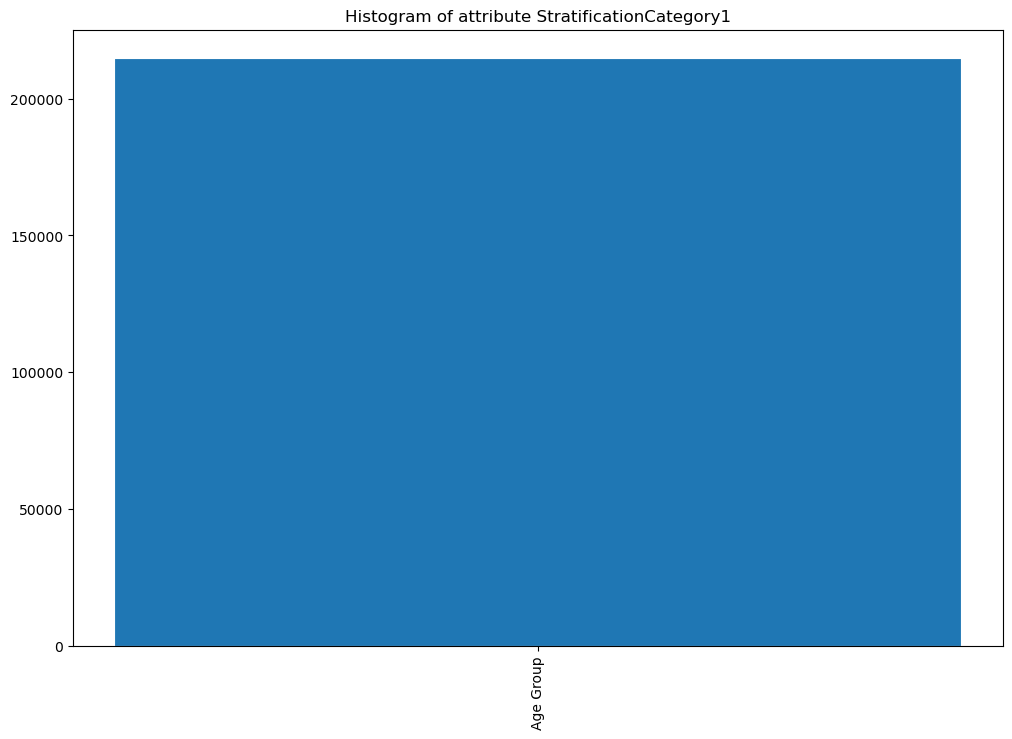

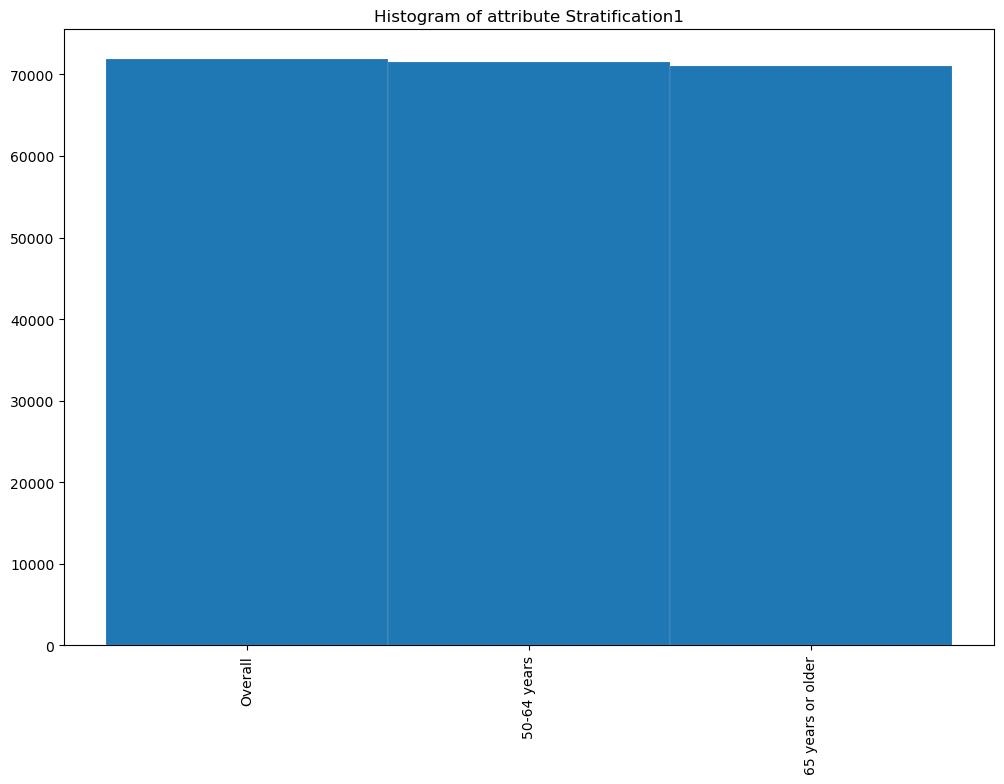

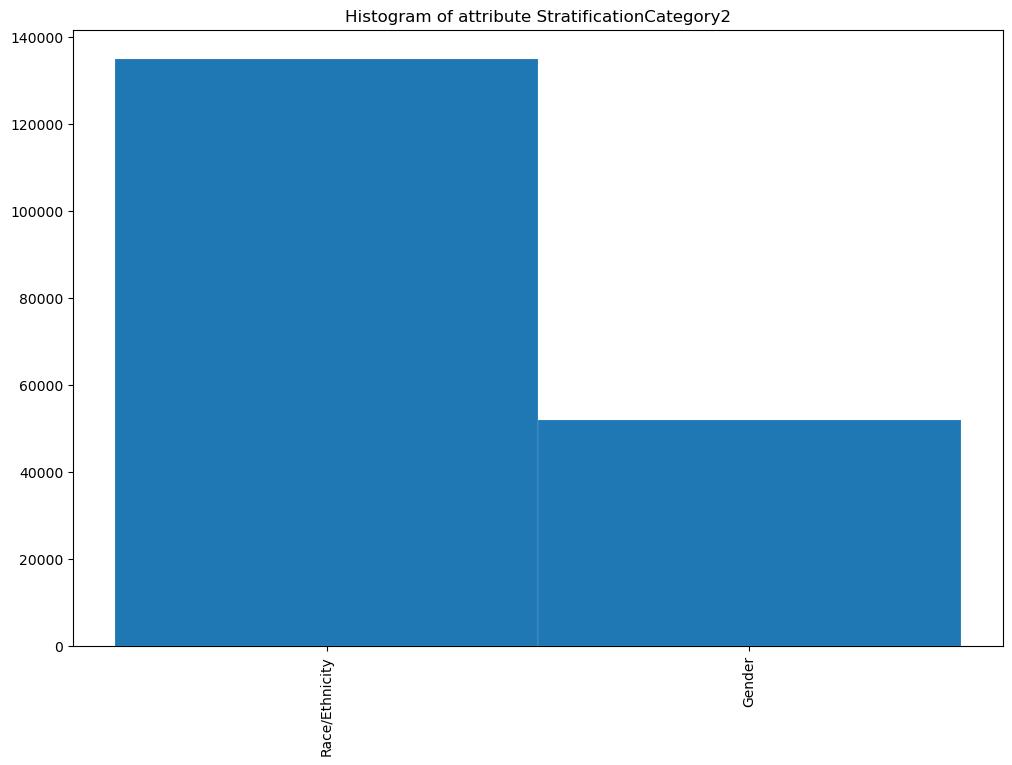

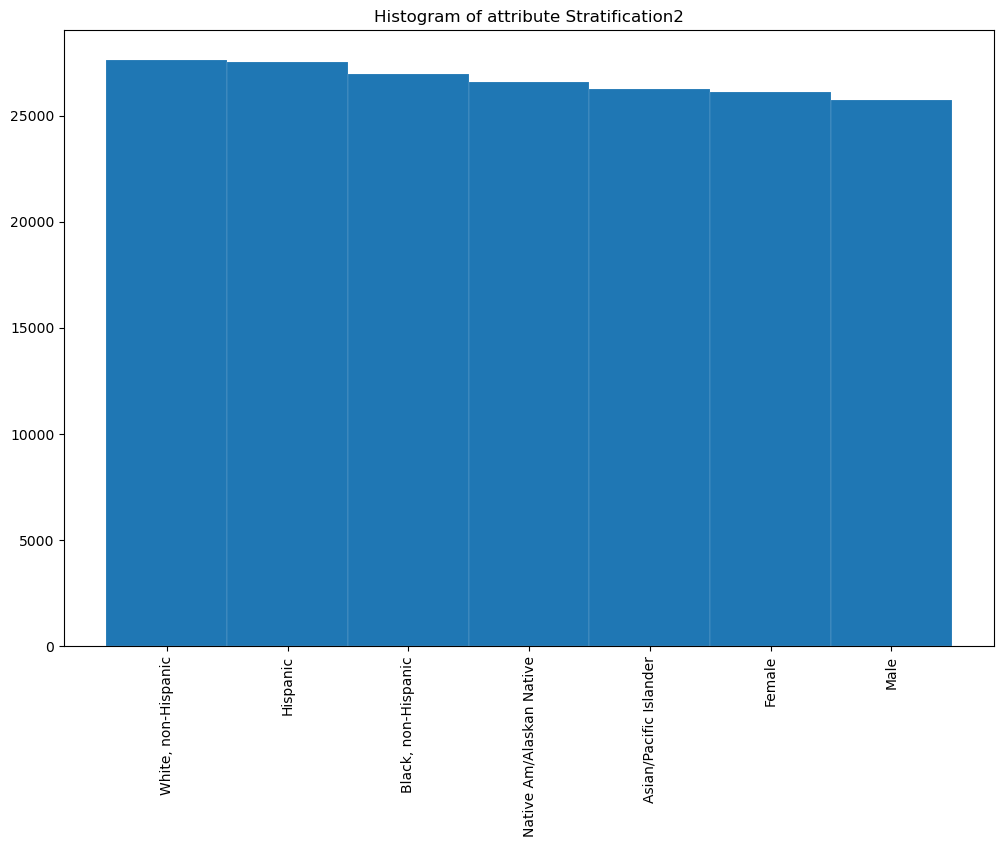

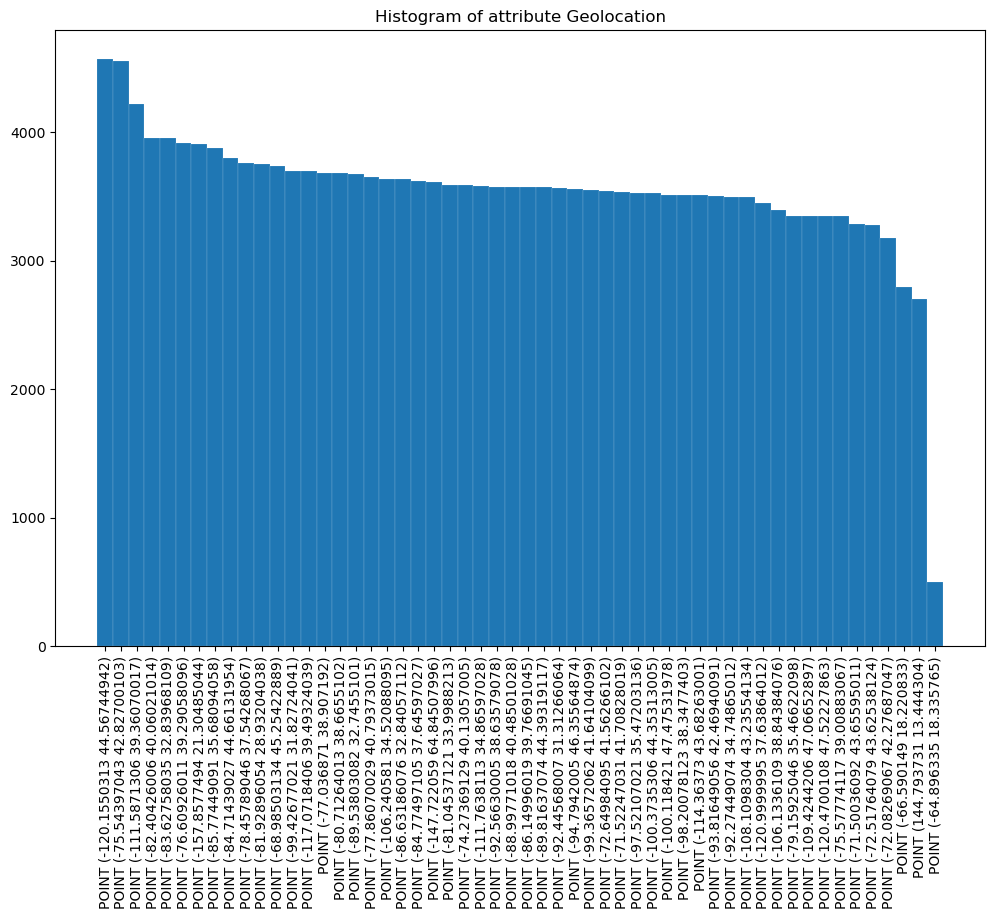

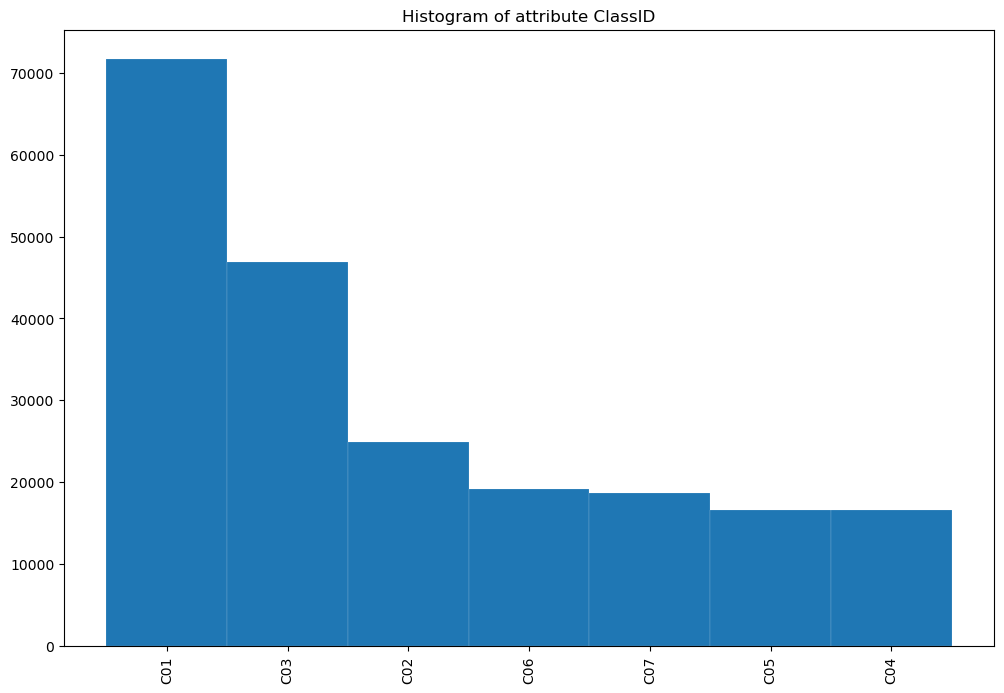

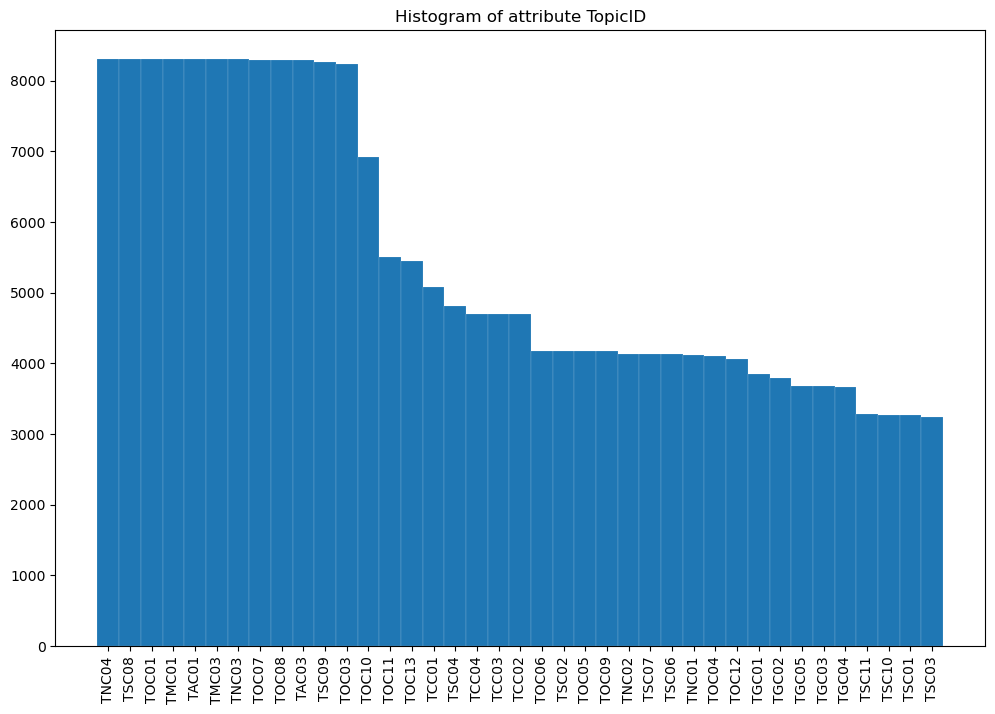

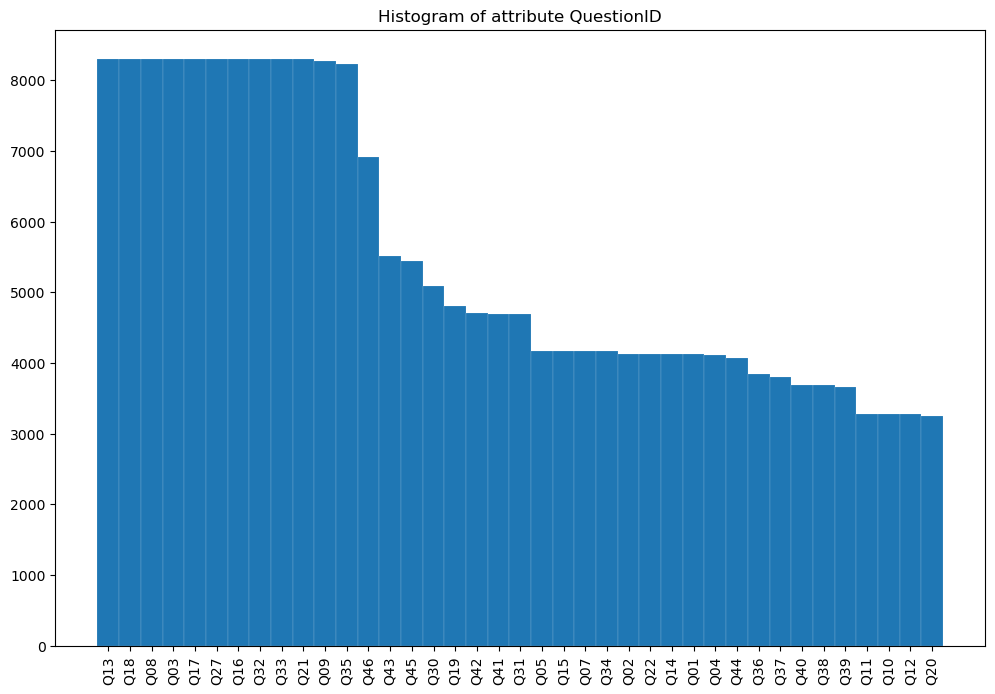

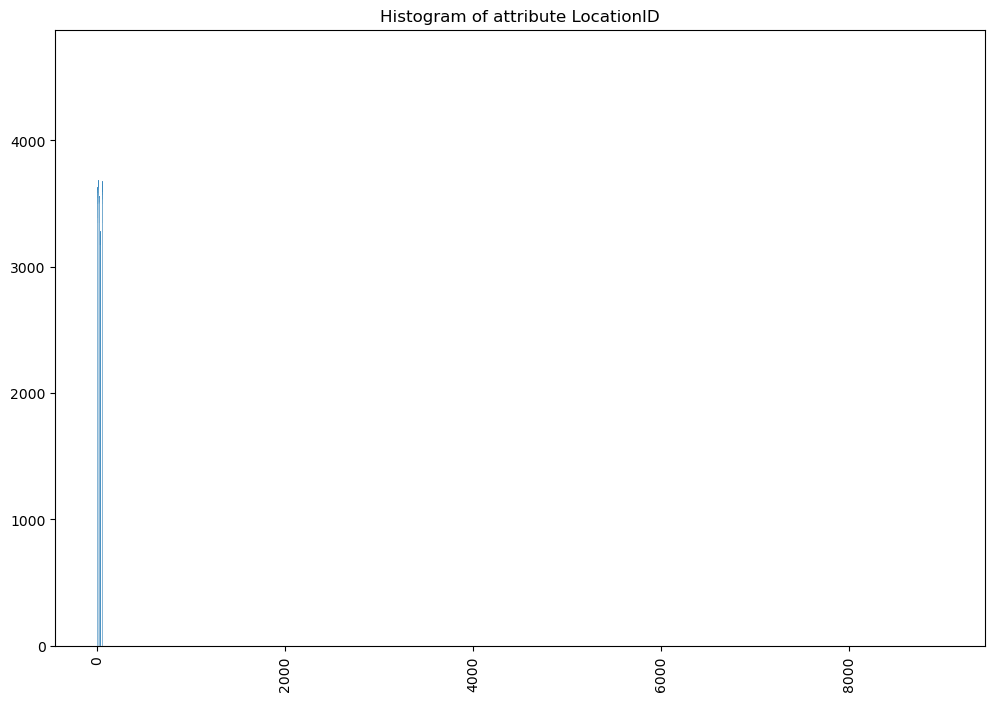

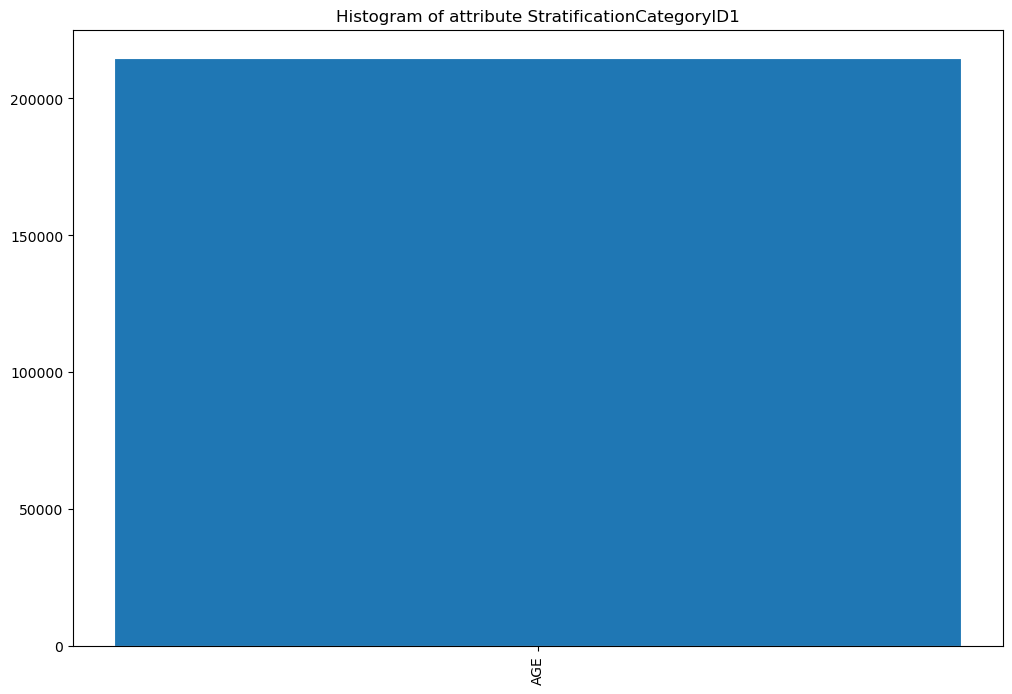

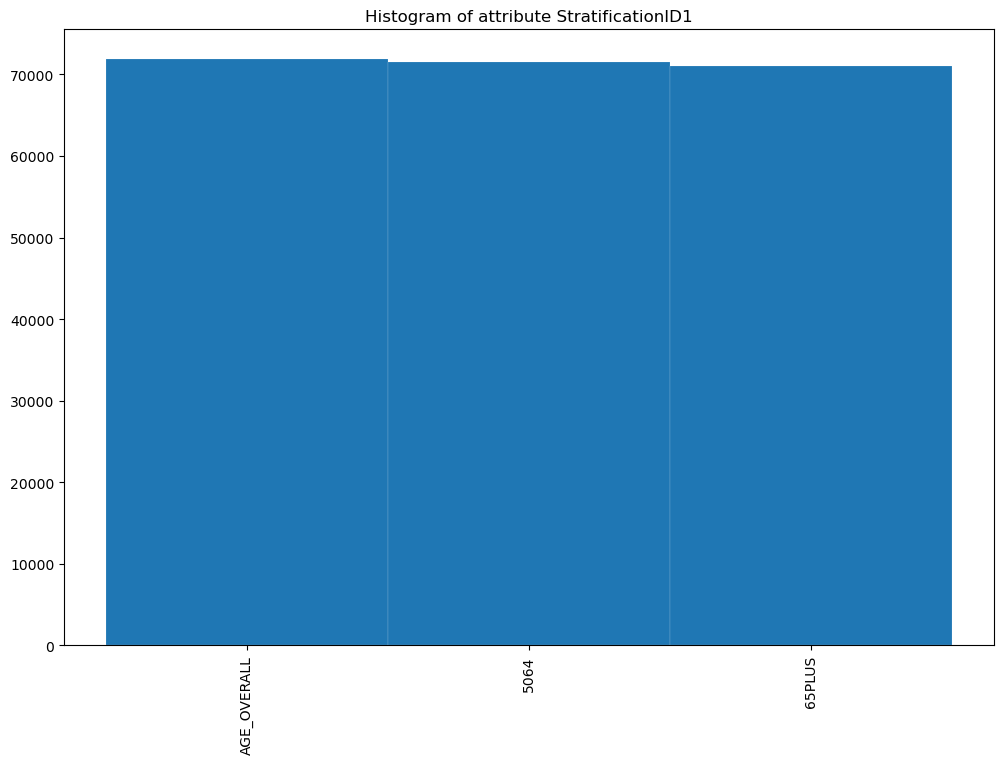

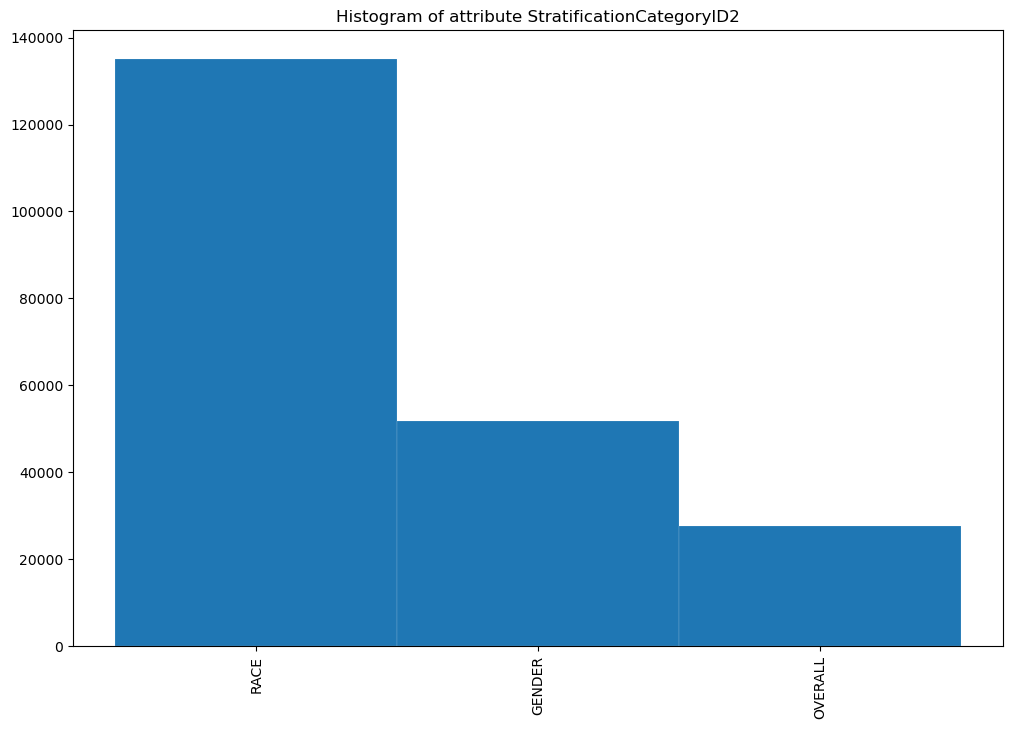

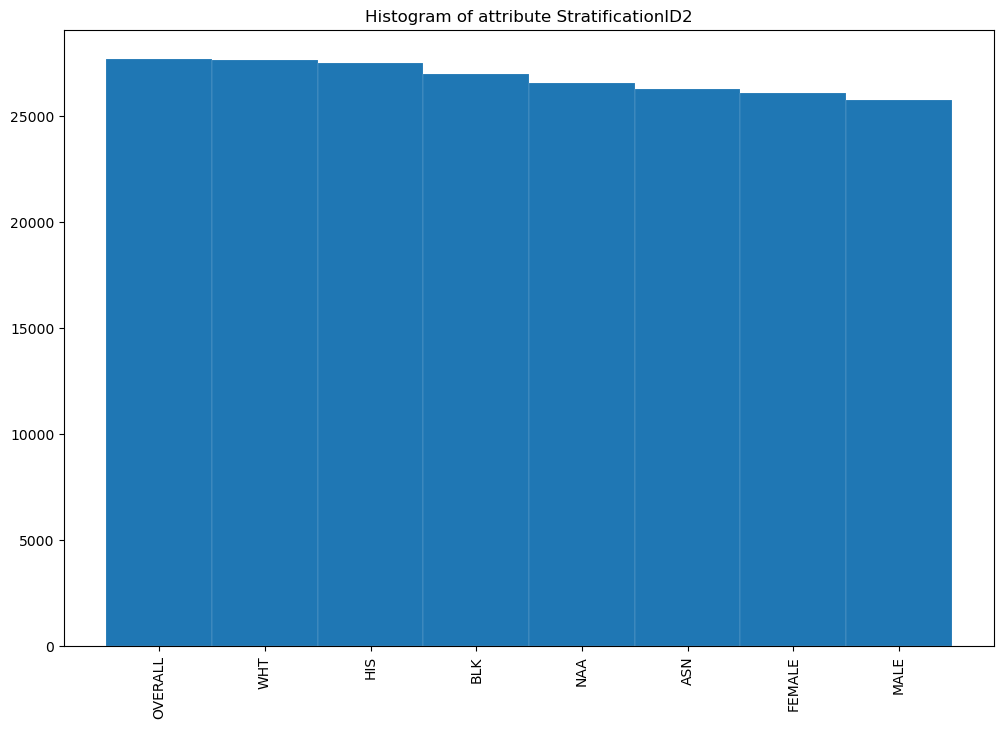

In [140]:
freqs = []
plt.rcParams['figure.figsize'] = (12.0, 8.0)
for i,c in enumerate(hcat_attr):
    freqs.append(frequency(hdata[c]))
    fig, ax = plt.subplots()
    ax.bar(freqs[i].index, freqs[i].values,  width = 1,edgecolor="white", linewidth=0.1)
    plt.xticks( rotation=90, fontsize=10)
    plt.title('Histogram of attribute '+c)
    plt.show()
    plt.close()

### 2.对数据集Movies Dataset from Pirated Sites的处理

#### 2.1数值属性的五数概括

In [206]:
five_number = five_number_summary(mdata[mnum_attr]) 
print('\t\t\t\t数值属性的五数概括')
print(five_number)

				数值属性的五数概括
     IMDb-rating  downloads  run_time      views
min          1.1        0.0       2.0      667.0
25%          4.8      855.5      90.0     7571.5
50%          5.7     2716.0     100.0    15222.0
75%          6.6    10070.0     117.0    36571.0
max          9.9   391272.0     321.0  1638533.0


#### 2.2数值属性的缺失值个数

In [5]:
losts = []
for c in mnum_attr:
    losts.append(num_of_null_value(mdata[c]))
print('各数值属性缺失值的个数')
print(*mnum_attr,sep=' ')
print(*losts,sep=' ')

各数值属性缺失值的个数
IMDb-rating downloads run_time views
841 1 1768 1


#### 2.3标称属性的频数以及可视化

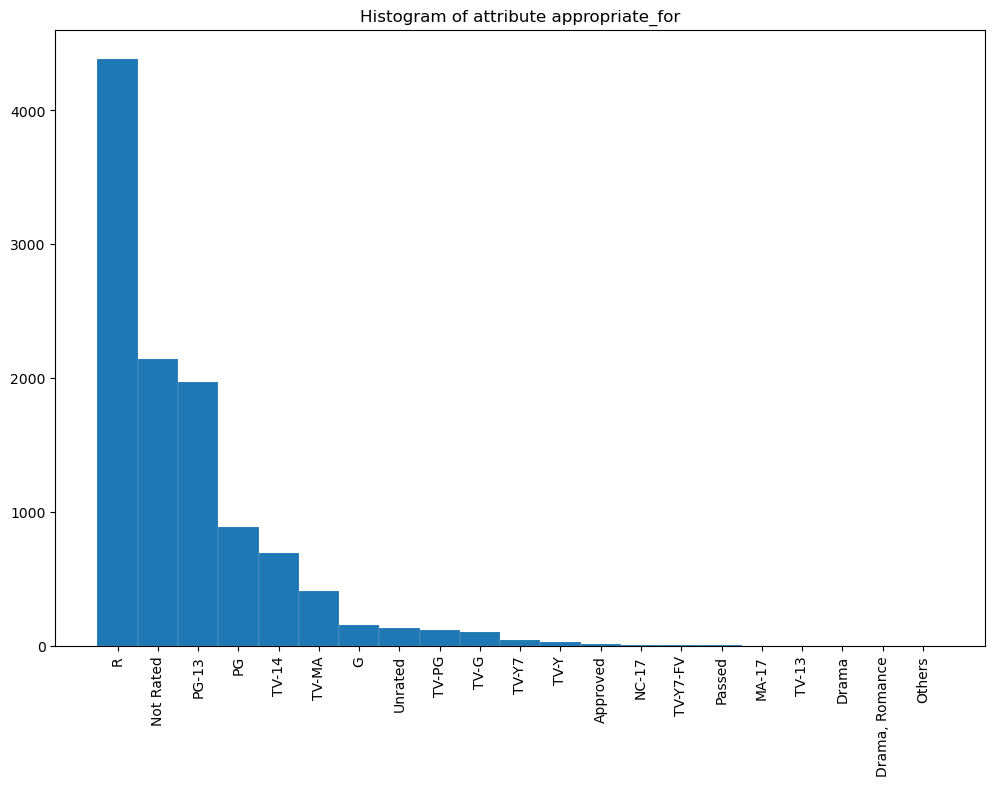

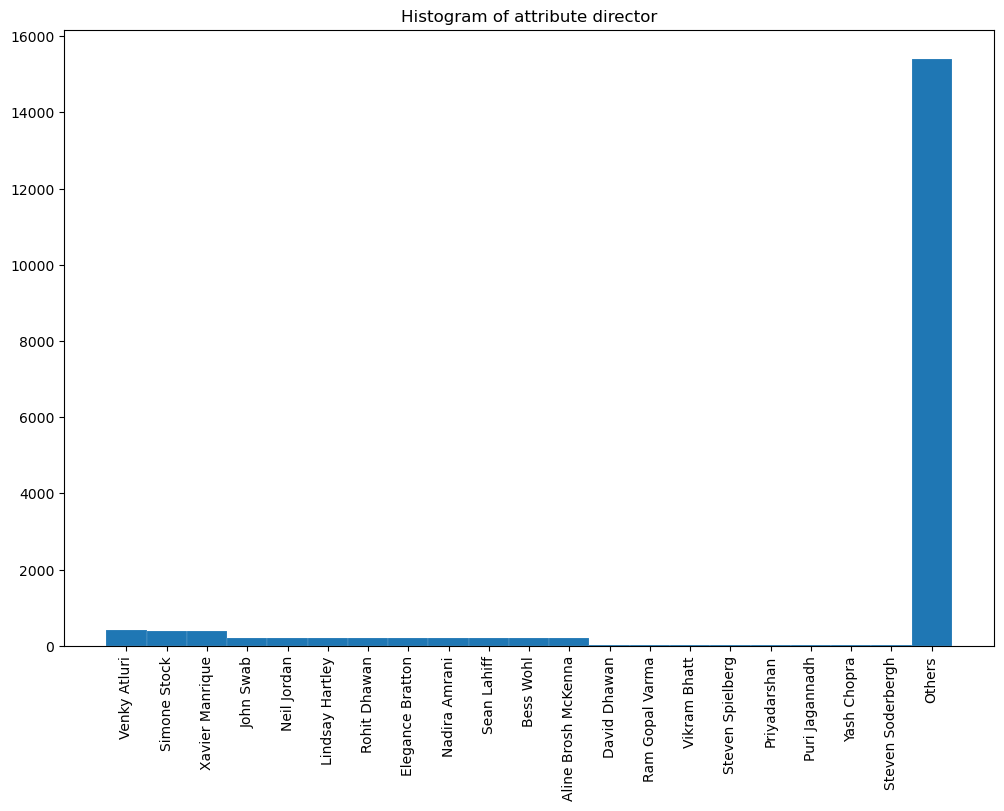

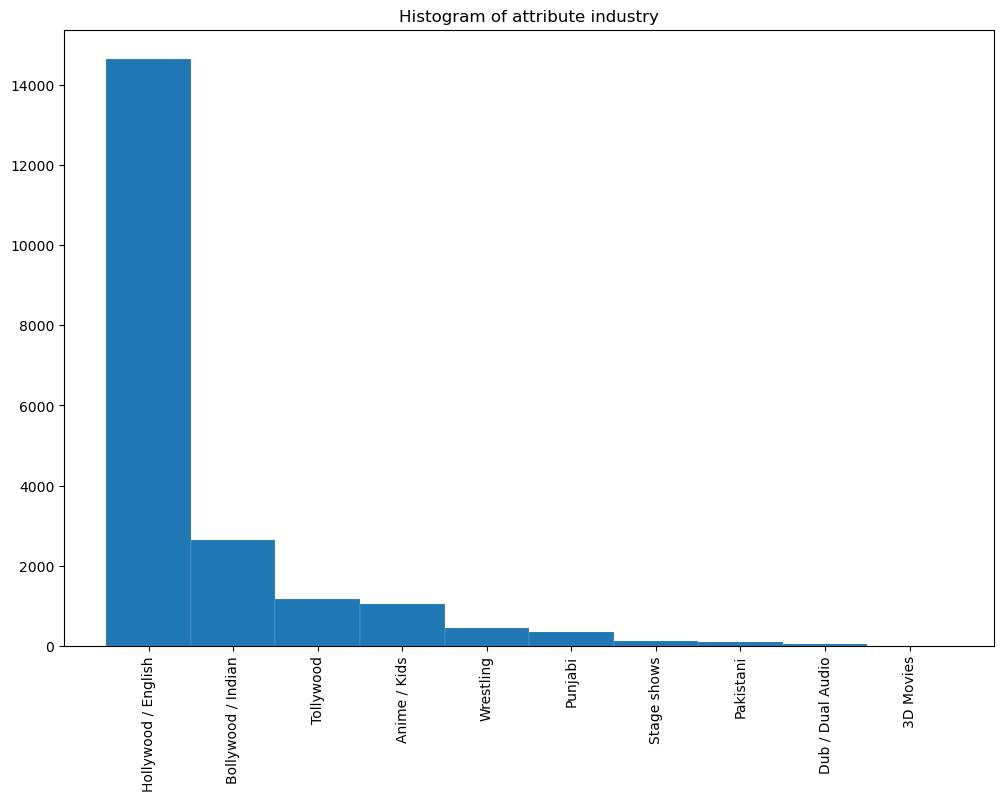

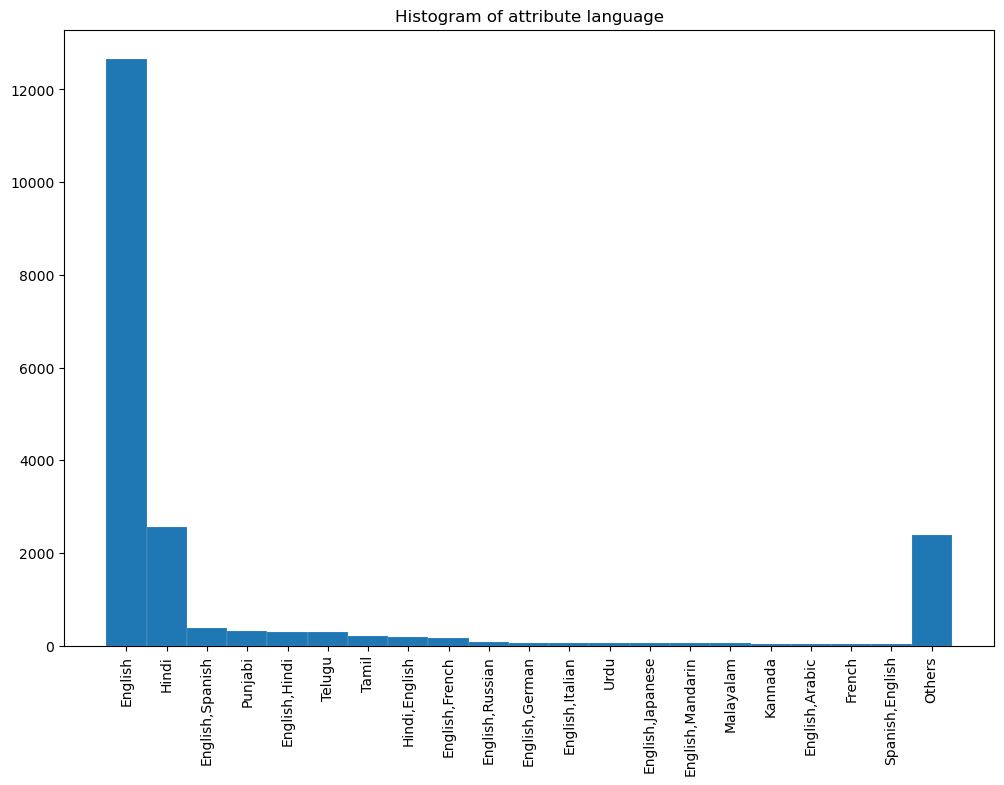

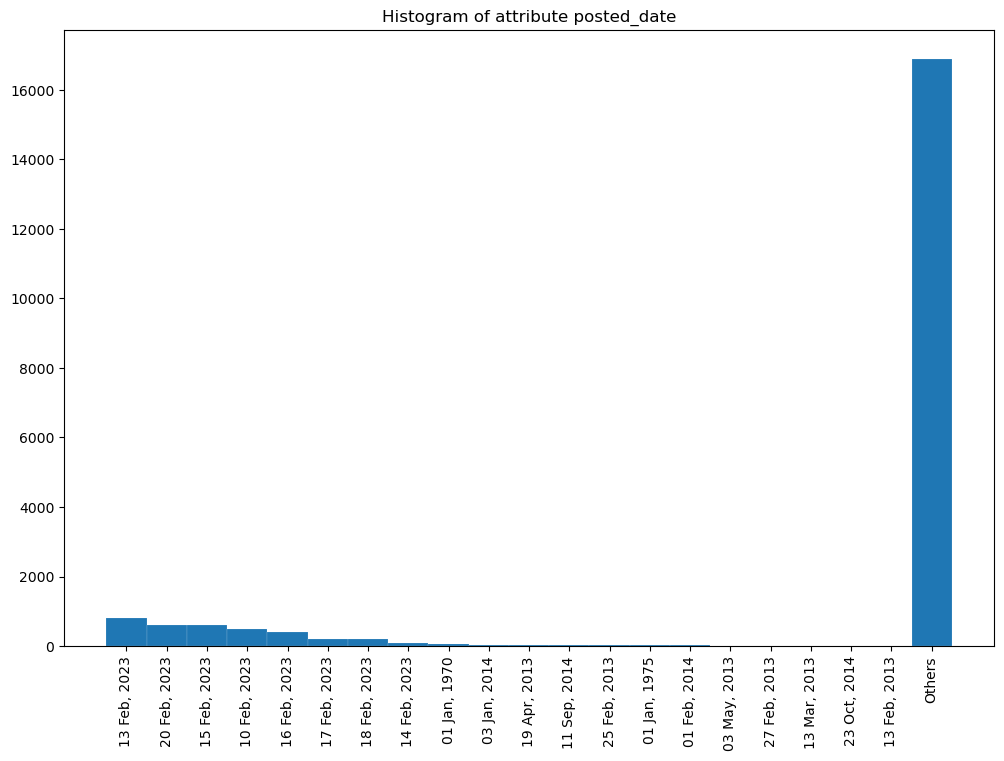

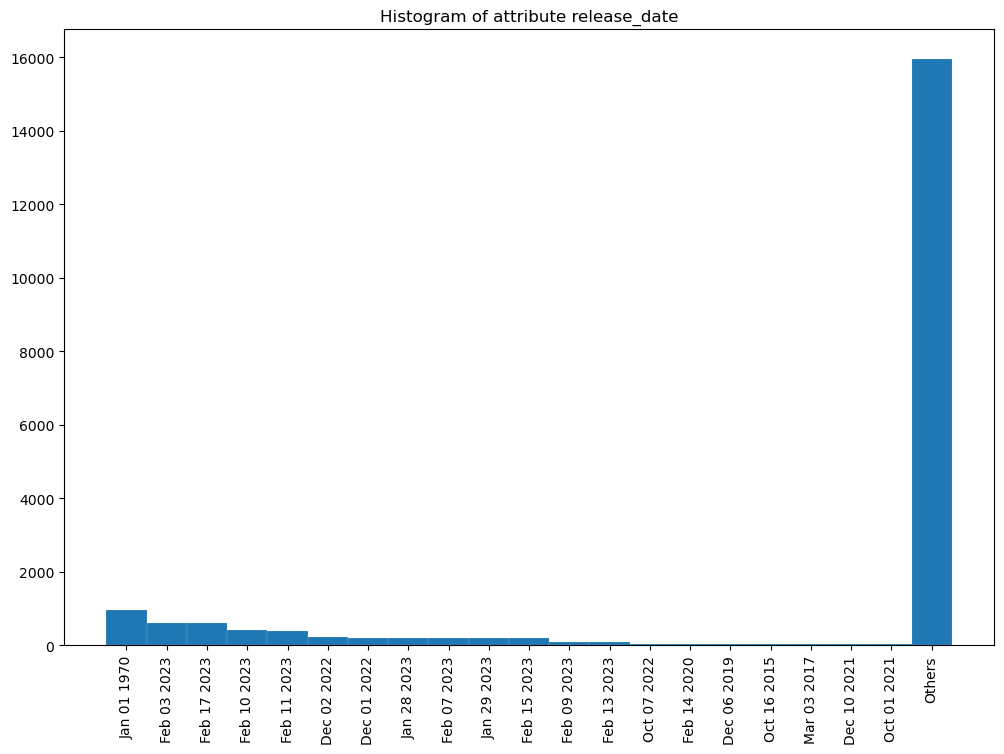

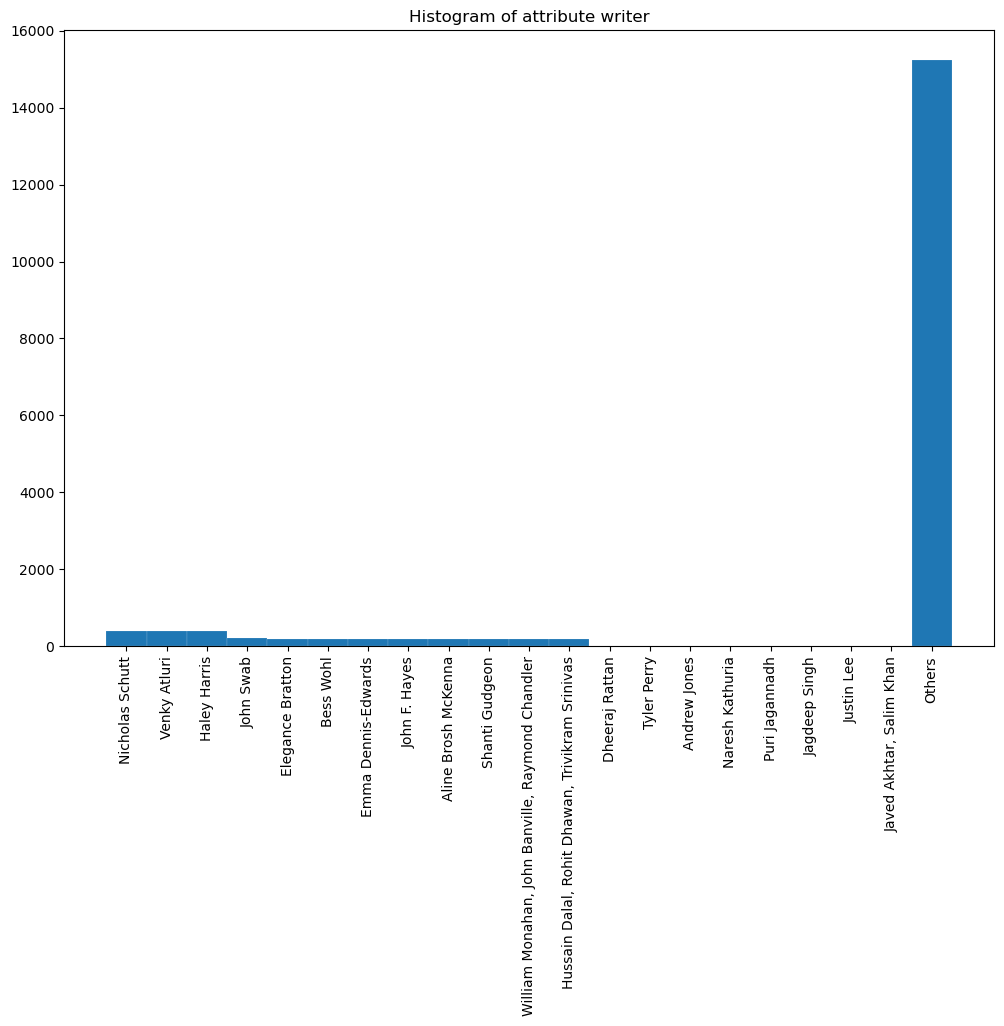

In [32]:
freqs = []
plt.rcParams['figure.figsize'] = (12.0, 8.0)
max_len = 20
for i,c in enumerate(mcat_attr):
    #print(i)
    freqs.append(frequency(mdata[c]))
    
    vlst = freqs[i].values.tolist()
    ilst = freqs[i].index.to_list()
    
    if len(vlst) > max_len:
        s = np.sum(vlst[max_len:])
        vlst = vlst[0:max_len]
        vlst.append(s)
        ilst = ilst[0:max_len]
        ilst.append('Others')
    fig, ax = plt.subplots()
    ax.bar(ilst, vlst,  width = 1,edgecolor="white", linewidth=0.1)
    
    plt.xticks( rotation=90, fontsize=10)
    plt.title('Histogram of attribute '+c)
    plt.show()
    plt.close()
    

## 三、数据缺失的处理

### 1.对数据集Alzheimer Disease and Healthy Aging Data In US的处理

#### 1.1剔除缺失值

In [81]:
'''
若仅对每个缺失值进行删除，会使得数据集中属性无法对齐，即行中缺失属性的值，或每个属性中数据数量不同
因此对于每一行，若该行中任意一个属性包含缺失值，删除该行
'''

#用原数据的副本进行操作，以免影响后续操作
hdata1 = hdata.copy()
print('剔除缺失值前数据集行数',len(hdata1['YearStart']))
losts = []
for c in hnum_attr:
    losts.append(num_of_null_value(hdata1[c]))
for c in hcat_attr:
    losts.append(num_of_null_value(hdata1[c]))
print('各属性缺失值的个数')
print(*hnum_attr,sep=' ')
print(*losts,sep=' ')
print()
#Sample_Size属性值全部缺失，将整列剔除
hdata1.drop(['Sample_Size'],axis = 1,inplace = True)
hdata1.dropna(inplace = True)
print('剔除缺失值后数据集行数',len(hdata1['YearStart']))
losts = []
for c in hnum_attr:
    if c == 'Sample_Size':
        continue
    losts.append(num_of_null_value(hdata1[c]))
for c in hcat_attr:
    losts.append(num_of_null_value(hdata1[c]))
print('各属性缺失值的个数')
print(*hnum_attr,sep=' ')
print(*losts,sep=' ')


剔除缺失值前数据集行数 214462
各属性缺失值的个数
YearStart YearEnd Data_Value Data_Value_Alt Low_Confidence_Limit High_Confidence_Limit Sample_Size
0 0 69833 69833 70009 70009 214462 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

剔除缺失值后数据集行数 144453
各属性缺失值的个数
YearStart YearEnd Data_Value Data_Value_Alt Low_Confidence_Limit High_Confidence_Limit Sample_Size
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


#### 1.2通过最高频率值填补

In [74]:
hdata2 = hdata.copy()
hdata2.drop(['Sample_Size'],axis = 1,inplace = True)
losts = []
for c in hcat_attr:
    losts.append(num_of_null_value(hdata2[c]))
print('各标称属性缺失值的个数')
print(*hcat_attr,sep=' ')
print(*losts,sep=' ')   

losts = []
for c in hnum_attr:
    if c == 'Sample_Size':
        continue
    losts.append(num_of_null_value(hdata2[c]))
print('各数值属性缺失值的个数')
print(*hnum_attr,sep=' ')
print(*losts,sep=' ')
freqs = []

各标称属性缺失值的个数
LocationAbbr LocationDesc Datasource Class Topic Question Data_Value_Unit DataValueTypeID Data_Value_Type StratificationCategory1 Stratification1 StratificationCategory2 Stratification2 Geolocation ClassID TopicID QuestionID LocationID StratificationCategoryID1 StratificationID1 StratificationCategoryID2 StratificationID2
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
各数值属性缺失值的个数
YearStart YearEnd Data_Value Data_Value_Alt Low_Confidence_Limit High_Confidence_Limit Sample_Size
0 0 69833 69833 70009 70009


又上面结果可知，各标称属性无缺失值，故只需对数值属性进行填补

In [75]:
for i,c in enumerate(hnum_attr):
    if c == 'Sample_Size':
        continue
    freqs.append(frequency(hdata2[c]))
    print('填补前频数最大的属性',c,'的频数',freqs[i].values[0])
    maxv = freqs[i].index[0]
    #lambda表达式将缺失值用最大频率值填补
    hdata2[c] = hdata2[c].apply(lambda x : maxv if pd.isna(x) else x)
    freqs[i] = frequency(hdata2[c])
    print('填补后频数最大的属性',c,'的频数',freqs[i].values[0]) 
    print()

losts = []
for c in hnum_attr:
    if c == 'Sample_Size':
        continue
    losts.append(num_of_null_value(hdata2[c]))
print('填补后各数值属性缺失值的个数')
print(*hnum_attr,sep=' ')
print(*losts,sep=' ')

填补前频数最大的属性 YearStart 的频数 45980
填补后频数最大的属性 YearStart 的频数 45980

填补前频数最大的属性 YearEnd 的频数 46966
填补后频数最大的属性 YearEnd 的频数 46966

填补前频数最大的属性 Data_Value 的频数 473
填补后频数最大的属性 Data_Value 的频数 70306

填补前频数最大的属性 Data_Value_Alt 的频数 473
填补后频数最大的属性 Data_Value_Alt 的频数 70306

填补前频数最大的属性 Low_Confidence_Limit 的频数 601
填补后频数最大的属性 Low_Confidence_Limit 的频数 70610

填补前频数最大的属性 High_Confidence_Limit 的频数 350
填补后频数最大的属性 High_Confidence_Limit 的频数 70359

填补后各数值属性缺失值的个数
YearStart YearEnd Data_Value Data_Value_Alt Low_Confidence_Limit High_Confidence_Limit Sample_Size
0 0 0 0 0 0


由以上结果可知，填补是有效的，各属性缺失值个数变为0，频数最大的属性的频数也增加了(原缺失值的个数)

#### 1.3通过属性相关关系填补

#### 1.4通过数据对象之间的相似性填补

### 2.对数据集Movies Dataset from Pirated Sites的处理

#### 2.1剔除缺失值

In [82]:
'''
若仅对每个缺失值进行删除，会使得数据集中属性无法对齐，即行中缺失属性的值，或每个属性中数据数量不同
因此对于每一行，若该行中任意一个属性包含缺失值，删除该行
'''

#用原数据的副本进行操作，以免影响后续操作
hdata1 = mdata.copy()
print('剔除缺失值后数据集行数',len(hdata1['writer']))
losts = []
for c in mnum_attr:
    losts.append(num_of_null_value(hdata1[c]))
for c in mcat_attr:
    losts.append(num_of_null_value(hdata1[c]))
print('剔除后各数值属性缺失值的个数')
print(*hnum_attr,sep=' ')
print(*losts,sep=' ')
print()
#Sample_Size属性值全部缺失，将整列剔除

hdata1.dropna(inplace = True)
print('剔除缺失值后数据集行数',len(hdata1['writer']))
losts = []
for c in mnum_attr:
    losts.append(num_of_null_value(hdata1[c]))
    
for c in mcat_attr:
    losts.append(num_of_null_value(hdata1[c]))
print('剔除后各属性缺失值的个数')
print(*hnum_attr,sep=' ')
print(*losts,sep=' ')


剔除缺失值后数据集行数 20548
剔除后各数值属性缺失值的个数
YearStart YearEnd Data_Value Data_Value_Alt Low_Confidence_Limit High_Confidence_Limit Sample_Size
841 1 1768 1 9476 1938 1 542 1 1 2192

剔除缺失值后数据集行数 9902
剔除后各属性缺失值的个数
YearStart YearEnd Data_Value Data_Value_Alt Low_Confidence_Limit High_Confidence_Limit Sample_Size
0 0 0 0 0 0 0 0 0 0 0


由上面结果可知结果合理

#### 2.2通过最高频率值填补

In [86]:
hdata2 = mdata.copy()

losts = []
for c in mcat_attr:
    losts.append(num_of_null_value(hdata2[c]))
for c in mnum_attr:
    losts.append(num_of_null_value(hdata2[c]))
print('填补前各属性缺失值的个数')
print(*mcat_attr,*mnum_attr,sep=' ')
print(*losts,sep=' ')   


填补前各属性缺失值的个数
appropriate_for director industry language posted_date release_date writer IMDb-rating downloads run_time views
9476 1938 1 542 1 1 2192 841 1 1768 1


In [88]:
freqs = []
for i,c in enumerate(mnum_attr):

    freqs.append(frequency(hdata2[c]))
    print('填补前频数最大的属性',c,'的频数',freqs[i].values[0])
    maxv = freqs[i].index[0]
    #lambda表达式将缺失值用最大频率值填补
    hdata2[c] = hdata2[c].apply(lambda x : maxv if pd.isna(x) else x)
    freqs[i] = frequency(hdata2[c])
    print('填补后频数最大的属性',c,'的频数',freqs[i].values[0]) 
    print()

losts = []
for c in mcat_attr:
    losts.append(num_of_null_value(hdata2[c]))
for c in mnum_attr:
    losts.append(num_of_null_value(hdata2[c]))
print('填补后各数值属性缺失值的个数')
print(*mcat_attr,*mnum_attr,sep=' ')
print(*losts,sep=' ')

填补前频数最大的属性 IMDb-rating 的频数 829
填补后频数最大的属性 IMDb-rating 的频数 1670

填补前频数最大的属性 downloads 的频数 403
填补后频数最大的属性 downloads 的频数 404

填补前频数最大的属性 run_time 的频数 853
填补后频数最大的属性 run_time 的频数 2621

填补前频数最大的属性 views 的频数 6
填补后频数最大的属性 views 的频数 7

填补后各数值属性缺失值的个数
appropriate_for director industry language posted_date release_date writer IMDb-rating downloads run_time views
9476 1938 1 542 1 1 2192 0 0 0 0


由以上结果可知，填补是有效的，各属性缺失值个数变为0，频数最大的属性的频数也增加了(原缺失值的个数)

#### 2.3通过属性相关关系填补

#### 2.4通过数据对象之间的相似性填补